In [1]:
# Import NumPy for numerical operations and array handling
import numpy as np

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Matplotlib for data visualization
import matplotlib.pyplot as plt

In [3]:
# Suppress all warnings to prevent them from appearing in the output

from warnings import filterwarnings
filterwarnings('ignore')



In [5]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Get the number of rows and columns in the DataFrame
df.shape

(10000, 14)

In [9]:
# Display a summary of the DataFrame, including the data types of each column and the non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
# Generate and display descriptive statistics for numerical columns in the DataFrame
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Generate and display descriptive statistics for categorical columns in the DataFrame
df.describe(include='object')



,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [15]:
# Calculate and display the number of missing values in each column of the DataFrame
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
# Drop the columns 'RowNumber', 'CustomerId', and 'Surname' from the DataFrame
# 'axis=1' specifies that columns (not rows) are being dropped
# 'inplace=True' modifies the DataFrame in place, without creating a new DataFrame

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)



In [19]:
# Display the first 5 rows of the DataFrame to review the changes after dropping columns
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# Display the data types of each column in the DataFrame
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
# Convert the 'HasCrCard' column to the 'object' data type
df['HasCrCard'] = df['HasCrCard'].astype('object')

# Convert the 'IsActiveMember' column to the 'object' data type
df['IsActiveMember'] = df['IsActiveMember'].astype('object')



In [25]:
# Display the data types of each column in the DataFrame
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited               int64
dtype: object

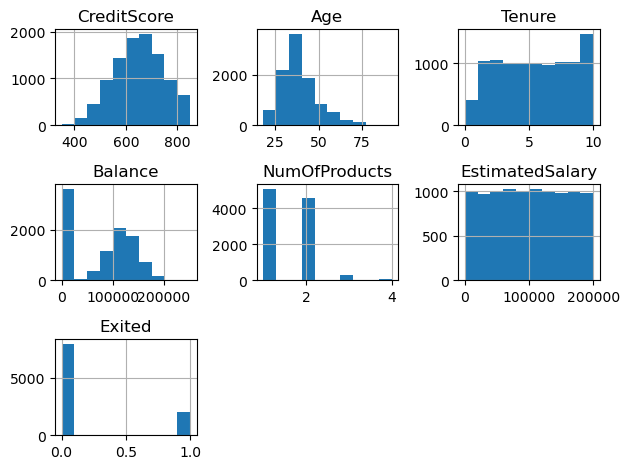

In [27]:
# plot the histogram of numeric  variables
df.hist()
plt.tight_layout()
plt.show()

In [28]:
# Select columns with numeric data types from the DataFrame
data_numeric = df.select_dtypes(include=np.number)


# Select columns with categorical (object) data types from the DataFrame
data_categoric = df.select_dtypes(include=object)


In [31]:
# Create dummy variables for categorical columns, dropping the first category to avoid multicollinearity
dummy_variables = pd.get_dummies(data_categoric, drop_first=True)


In [33]:
# Combine the numeric columns and dummy variables into a single DataFrame
# 'axis=1' specifies that columns are being concatenated

data_dummy = pd.concat([data_numeric, dummy_variables], axis=1)

# Display the first 5 rows of the combined DataFrame
data_dummy.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,False,False,False,True,True
1,608,41,1,83807.86,1,112542.58,0,False,True,False,False,True
2,502,42,8,159660.80,3,113931.57,1,False,False,False,True,False
3,699,39,1,0.00,2,93826.63,0,False,False,False,False,False
4,850,43,2,125510.82,1,79084.10,0,False,True,False,True,True


In [35]:
# Separate the features (X) by dropping the 'Exited' column from the DataFrame
X = data_dummy.drop(['Exited'], axis=1)

# Extract the target variable (y) as a DataFrame from the 'Exited' column
y = pd.DataFrame(data_dummy['Exited'])


In [37]:
# Import train_test_split from sklearn for splitting the dataset

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size=0.3 specifies that 30% of the data will be used for testing
# random_state=1 ensures reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)


In [38]:
# Import the DecisionTreeClassifier from sklearn

from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier with entropy criterion
# random_state is set for reproducibility

decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=18)

# Train the decision tree model using the training data
# 'fit' method trains the model on X_train and y_train

model = decision_tree.fit(X_train, y_train)


In [41]:
# Use the trained decision tree model to predict the target values for the test set
y_pred = model.predict(X_test)

# Display the predicted values for the first 50 instances in the test set
y_pred[1:100]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy



0.792

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Step 5: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = svm_model.predict(X_test)


# Step 7: Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix2 = confusion_matrix(y_test, y_pred)
class_report2 = classification_report(y_test, y_pred)

In [ ]:
# Output the results
print(f'Accuracy: {accuracy2 * 100:.2f}%')

In [ ]:
print('Confusion Matrix:')
print(conf_matrix2)

In [ ]:
print('Classification Report:')
print(class_report2)

In [ ]:
# Step 5: Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Step 7: Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred)
conf_matrix3= confusion_matrix(y_test, y_pred)
class_report3 = classification_report(y_test, y_pred)

In [ ]:
# Output the results
print(f'Accuracy: {accuracy3 * 100:.2f}%')


In [ ]:
print('Confusion Matrix:')
print(conf_matrix3)

In [ ]:
print('Confusion Matrix:')
print(conf_matrix3)